<a href="https://colab.research.google.com/github/raohxxx/Telecom-2-challenge/blob/main/telecomX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge Telecom X parte 2

## 1.-Importando los datos de Telecom x

In [458]:
import pandas as pd
url='https://github.com/raohxxx/Telecom-2-challenge/raw/refs/heads/main/datos_limpios3.csv'
df=pd.read_csv(url)

df.head()


,IDcliente,CHURN,GENERO_CLIENTE,ADULTO_MAYOR,CON_PAREJA,CLIENTE_CON_DEPENDIENTE,ANTIGUEDAD_CLIENTE,SERVICIO_TELEFONO,MULTIPLES_LINEAS,S_INTERNET,...,PROTECCION_DISPOSITIVOS,SOPORTE_TECNICO,TV_STREAMING,PELICULAS_STREAMING,CONTRATO,BOLETA_ELECTRONICA,METODO_PAGO,CARGO_MENSUAL,CARGO_TOTAL,Cuentas_Diarias
0,0002-ORFBO,No,Mujer,0,Si,Si,9,Si,No,DSL,...,No,Si,Si,No,One year,Si,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Hombre,0,No,No,9,Si,Si,DSL,...,No,No,No,Si,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Si,Hombre,0,No,No,4,Si,No,Fiber optic,...,Si,No,No,No,Month-to-month,Si,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Si,Hombre,1,Si,No,13,Si,No,Fiber optic,...,Si,No,Si,Si,Month-to-month,Si,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Si,Mujer,1,Si,No,3,Si,No,Fiber optic,...,No,Si,Si,No,Month-to-month,Si,Mailed check,83.9,267.40,2.80


In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   IDcliente                7043 non-null   object 
 1   CHURN                    7043 non-null   object 
 2   GENERO_CLIENTE           7043 non-null   object 
 3   ADULTO_MAYOR             7043 non-null   int64  
 4   CON_PAREJA               7043 non-null   object 
 5   CLIENTE_CON_DEPENDIENTE  7043 non-null   object 
 6   ANTIGUEDAD_CLIENTE       7043 non-null   int64  
 7   SERVICIO_TELEFONO        7043 non-null   object 
 8   MULTIPLES_LINEAS         7043 non-null   object 
 9   S_INTERNET               7043 non-null   object 
 10  SEGURIDAD_ONLINE         7043 non-null   object 
 11  RESPALDO_ONLINE          7043 non-null   object 
 12  PROTECCION_DISPOSITIVOS  7043 non-null   object 
 13  SOPORTE_TECNICO          7043 non-null   object 
 14  TV_STREAMING            

In [460]:
df.isna().sum()

,0
IDcliente,0
CHURN,0
GENERO_CLIENTE,0
ADULTO_MAYOR,0
CON_PAREJA,0
CLIENTE_CON_DEPENDIENTE,0
ANTIGUEDAD_CLIENTE,0
SERVICIO_TELEFONO,0
MULTIPLES_LINEAS,0
S_INTERNET,0


In [461]:
#cambiando los valores vacios a 0
mask=df['CARGO_TOTAL'].isna()
# validado para archivo anterior df.loc[mask,'account.Charges.Total']=0
df.isna().sum()

,0
IDcliente,0
CHURN,0
GENERO_CLIENTE,0
ADULTO_MAYOR,0
CON_PAREJA,0
CLIENTE_CON_DEPENDIENTE,0
ANTIGUEDAD_CLIENTE,0
SERVICIO_TELEFONO,0
MULTIPLES_LINEAS,0
S_INTERNET,0


##eliminacion columnas no relevantes

In [462]:
df=df.drop( columns=['IDcliente','Cuentas_Diarias'])
df.head()

,CHURN,GENERO_CLIENTE,ADULTO_MAYOR,CON_PAREJA,CLIENTE_CON_DEPENDIENTE,ANTIGUEDAD_CLIENTE,SERVICIO_TELEFONO,MULTIPLES_LINEAS,S_INTERNET,SEGURIDAD_ONLINE,RESPALDO_ONLINE,PROTECCION_DISPOSITIVOS,SOPORTE_TECNICO,TV_STREAMING,PELICULAS_STREAMING,CONTRATO,BOLETA_ELECTRONICA,METODO_PAGO,CARGO_MENSUAL,CARGO_TOTAL
0,No,Mujer,0,Si,Si,9,Si,No,DSL,No,Si,No,Si,Si,No,One year,Si,Mailed check,65.6,593.30
1,No,Hombre,0,No,No,9,Si,Si,DSL,No,No,No,No,No,Si,Month-to-month,No,Mailed check,59.9,542.40
2,Si,Hombre,0,No,No,4,Si,No,Fiber optic,No,No,Si,No,No,No,Month-to-month,Si,Electronic check,73.9,280.85
3,Si,Hombre,1,Si,No,13,Si,No,Fiber optic,No,Si,Si,No,Si,Si,Month-to-month,Si,Electronic check,98.0,1237.85
4,Si,Mujer,1,Si,No,3,Si,No,Fiber optic,No,No,No,Si,Si,No,Month-to-month,Si,Mailed check,83.9,267.40


## transformacion de columnas categoricas a numericas

In [463]:
columns=df.columns
'''for x in columns:
  print((x,df[x].unique()))'''
columnas_categoricas=['S_INTERNET','SEGURIDAD_ONLINE','RESPALDO_ONLINE','PROTECCION_DISPOSITIVOS','SOPORTE_TECNICO','TV_STREAMING','PELICULAS_STREAMING','CONTRATO','METODO_PAGO']

In [464]:
columnas_binarias = ['CHURN', 'GENERO_CLIENTE', 'CON_PAREJA', 'CLIENTE_CON_DEPENDIENTE', 'SERVICIO_TELEFONO','MULTIPLES_LINEAS','BOLETA_ELECTRONICA']
columnas_numericas=['CARGO_MENSUAL','CARGO_TOTAL']
'''for col in columnas_binarias:
    df[col] = df[col].replace({'Si': 1, 'No': 0, 'Mujer':0,'Hombre':1})

df_encoded = pd.get_dummies(data=df, columns=columnas_categoricas, dtype=int)
display(df_encoded.sample(5))'''


"for col in columnas_binarias:\n    df[col] = df[col].replace({'Si': 1, 'No': 0, 'Mujer':0,'Hombre':1})\n\ndf_encoded = pd.get_dummies(data=df, columns=columnas_categoricas, dtype=int)\ndisplay(df_encoded.sample(5))"

In [465]:
#df_encoded.info()
#columnas=columnas_binarias+columnas_categoricas
df_encoded=df[columns]
df_encoded.head()

,CHURN,GENERO_CLIENTE,ADULTO_MAYOR,CON_PAREJA,CLIENTE_CON_DEPENDIENTE,ANTIGUEDAD_CLIENTE,SERVICIO_TELEFONO,MULTIPLES_LINEAS,S_INTERNET,SEGURIDAD_ONLINE,RESPALDO_ONLINE,PROTECCION_DISPOSITIVOS,SOPORTE_TECNICO,TV_STREAMING,PELICULAS_STREAMING,CONTRATO,BOLETA_ELECTRONICA,METODO_PAGO,CARGO_MENSUAL,CARGO_TOTAL
0,No,Mujer,0,Si,Si,9,Si,No,DSL,No,Si,No,Si,Si,No,One year,Si,Mailed check,65.6,593.30
1,No,Hombre,0,No,No,9,Si,Si,DSL,No,No,No,No,No,Si,Month-to-month,No,Mailed check,59.9,542.40
2,Si,Hombre,0,No,No,4,Si,No,Fiber optic,No,No,Si,No,No,No,Month-to-month,Si,Electronic check,73.9,280.85
3,Si,Hombre,1,Si,No,13,Si,No,Fiber optic,No,Si,Si,No,Si,Si,Month-to-month,Si,Electronic check,98.0,1237.85
4,Si,Mujer,1,Si,No,3,Si,No,Fiber optic,No,No,No,Si,Si,No,Month-to-month,Si,Mailed check,83.9,267.40


In [466]:
X=df_encoded.drop(columns=['CHURN'])
y=df_encoded['CHURN']
display(X.head())
display(y.head())

,GENERO_CLIENTE,ADULTO_MAYOR,CON_PAREJA,CLIENTE_CON_DEPENDIENTE,ANTIGUEDAD_CLIENTE,SERVICIO_TELEFONO,MULTIPLES_LINEAS,S_INTERNET,SEGURIDAD_ONLINE,RESPALDO_ONLINE,PROTECCION_DISPOSITIVOS,SOPORTE_TECNICO,TV_STREAMING,PELICULAS_STREAMING,CONTRATO,BOLETA_ELECTRONICA,METODO_PAGO,CARGO_MENSUAL,CARGO_TOTAL
0,Mujer,0,Si,Si,9,Si,No,DSL,No,Si,No,Si,Si,No,One year,Si,Mailed check,65.6,593.30
1,Hombre,0,No,No,9,Si,Si,DSL,No,No,No,No,No,Si,Month-to-month,No,Mailed check,59.9,542.40
2,Hombre,0,No,No,4,Si,No,Fiber optic,No,No,Si,No,No,No,Month-to-month,Si,Electronic check,73.9,280.85
3,Hombre,1,Si,No,13,Si,No,Fiber optic,No,Si,Si,No,Si,Si,Month-to-month,Si,Electronic check,98.0,1237.85
4,Mujer,1,Si,No,3,Si,No,Fiber optic,No,No,No,Si,Si,No,Month-to-month,Si,Mailed check,83.9,267.40


,CHURN
0,No
1,No
2,Si
3,Si
4,Si


In [467]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

columnas = X.columns
columnas_numericas = ['ANTIGUEDAD_CLIENTE','CARGO_MENSUAL', 'CARGO_TOTAL']
columnasS=columnas.drop(columnas_numericas)
display(columnasS)

Index(['GENERO_CLIENTE', 'ADULTO_MAYOR', 'CON_PAREJA',
       'CLIENTE_CON_DEPENDIENTE', 'SERVICIO_TELEFONO', 'MULTIPLES_LINEAS',
       'S_INTERNET', 'SEGURIDAD_ONLINE', 'RESPALDO_ONLINE',
       'PROTECCION_DISPOSITIVOS', 'SOPORTE_TECNICO', 'TV_STREAMING',
       'PELICULAS_STREAMING', 'CONTRATO', 'BOLETA_ELECTRONICA', 'METODO_PAGO'],
      dtype='object')

In [470]:
one_hot = make_column_transformer((
    OneHotEncoder(categories='auto',dtype=int,
                  drop = 'if_binary'),
    columnasS),

    remainder = 'passthrough',
    sparse_threshold=0,
    force_int_remainder_cols=False)

In [471]:
X = one_hot.fit_transform(X)
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__GENERO_CLIENTE_Mujer',
       'onehotencoder__ADULTO_MAYOR_1', 'onehotencoder__CON_PAREJA_Si',
       'onehotencoder__CLIENTE_CON_DEPENDIENTE_Si',
       'onehotencoder__SERVICIO_TELEFONO_Si',
       'onehotencoder__MULTIPLES_LINEAS_No',
       'onehotencoder__MULTIPLES_LINEAS_No phone service',
       'onehotencoder__MULTIPLES_LINEAS_Si',
       'onehotencoder__S_INTERNET_DSL',
       'onehotencoder__S_INTERNET_Fiber optic',
       'onehotencoder__S_INTERNET_No',
       'onehotencoder__SEGURIDAD_ONLINE_No',
       'onehotencoder__SEGURIDAD_ONLINE_No internet service',
       'onehotencoder__SEGURIDAD_ONLINE_Si',
       'onehotencoder__RESPALDO_ONLINE_No',
       'onehotencoder__RESPALDO_ONLINE_No internet service',
       'onehotencoder__RESPALDO_ONLINE_Si',
       'onehotencoder__PROTECCION_DISPOSITIVOS_No',
       'onehotencoder__PROTECCION_DISPOSITIVOS_No internet service',
       'onehotencoder__PROTECCION_DISPOSITIVOS_Si',
       'onehotencoder__SOPORTE_TEC

In [476]:
X=pd.DataFrame(X, columns = one_hot.get_feature_names_out(columnas))
#X=pd.concat([X,df[columnas_numericas]], axis=1)
X = X.astype(int)
X.head()

,onehotencoder__GENERO_CLIENTE_Mujer,onehotencoder__ADULTO_MAYOR_1,onehotencoder__CON_PAREJA_Si,onehotencoder__CLIENTE_CON_DEPENDIENTE_Si,onehotencoder__SERVICIO_TELEFONO_Si,onehotencoder__MULTIPLES_LINEAS_No,onehotencoder__MULTIPLES_LINEAS_No phone service,onehotencoder__MULTIPLES_LINEAS_Si,onehotencoder__S_INTERNET_DSL,onehotencoder__S_INTERNET_Fiber optic,...,onehotencoder__CONTRATO_One year,onehotencoder__CONTRATO_Two year,onehotencoder__BOLETA_ELECTRONICA_Si,onehotencoder__METODO_PAGO_Bank transfer (automatic),onehotencoder__METODO_PAGO_Credit card (automatic),onehotencoder__METODO_PAGO_Electronic check,onehotencoder__METODO_PAGO_Mailed check,remainder__ANTIGUEDAD_CLIENTE,remainder__CARGO_MENSUAL,remainder__CARGO_TOTAL
0,1,0,1,1,1,1,0,0,1,0,...,1,0,1,0,0,0,1,9,65,593
1,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,1,9,59,542
2,0,0,0,0,1,1,0,0,0,1,...,0,0,1,0,0,1,0,4,73,280
3,0,1,1,0,1,1,0,0,0,1,...,0,0,1,0,0,1,0,13,98,1237
4,1,1,1,0,1,1,0,0,0,1,...,0,0,1,0,0,0,1,3,83,267


In [477]:

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                                                      Non-Null Count  Dtype
---  ------                                                      --------------  -----
 0   onehotencoder__GENERO_CLIENTE_Mujer                         7043 non-null   int64
 1   onehotencoder__ADULTO_MAYOR_1                               7043 non-null   int64
 2   onehotencoder__CON_PAREJA_Si                                7043 non-null   int64
 3   onehotencoder__CLIENTE_CON_DEPENDIENTE_Si                   7043 non-null   int64
 4   onehotencoder__SERVICIO_TELEFONO_Si                         7043 non-null   int64
 5   onehotencoder__MULTIPLES_LINEAS_No                          7043 non-null   int64
 6   onehotencoder__MULTIPLES_LINEAS_No phone service            7043 non-null   int64
 7   onehotencoder__MULTIPLES_LINEAS_Si                          7043 non-null   int64
 8   onehotencoder__S_I

In [473]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y=pd.Series(y)
y.head()

,0
0,0
1,0
2,1
3,1
4,1


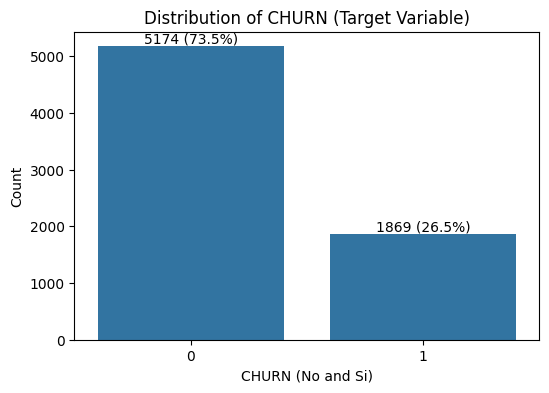

In [474]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(6, 4))
ax = sns.countplot(x=y)
plt.title('Distribution of CHURN (Target Variable)')
plt.xlabel('CHURN (No and Si)')
plt.ylabel('Count')

# Add annotations
total = len(y)
y_series = pd.Series(y) # Convert y to pandas Series
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(f'{int(y)} ({percentage})', (x, y), ha='center', va='bottom')

plt.show()

In [ ]:
X = X.astype(int)
X.head()